In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler , LabelEncoder
import missingno as mis
# pr-eprocessing 
from sklearn.pipeline import Pipeline , FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split , cross_val_score , cross_val_predict , GridSearchCV , RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')
import os

# Set styling for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")

In [2]:
## Show some data 
pathfile = "D:\ML_data\gold price data.csv"

if os.path.exists(pathfile):
    df = pd.read_csv(pathfile)
    print(df.head())
    
else:
    print("Sorry , your file not found.")

       Date          SPX        GLD        USO     SLV   EUR/USD
0  1/2/2008  1447.160034  84.860001  78.470001  15.180  1.471692
1  1/3/2008  1447.160034  85.570000  78.370003  15.285  1.474491
2  1/4/2008  1411.630005  85.129997  77.309998  15.167  1.475492
3  1/7/2008  1416.180054  84.769997  75.500000  15.053  1.468299
4  1/8/2008  1390.189941  86.779999  76.059998  15.590  1.557099


In [3]:
df.head()


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.tail()


,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# Summary for Numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SPX,2290.0,1654.315776,519.111540,676.530029,1239.874969,1551.434998,2073.010070,2872.870117
GLD,2290.0,122.732875,23.283346,70.000000,109.725000,120.580002,132.840004,184.589996
USO,2290.0,31.842221,19.523517,7.960000,14.380000,33.869999,37.827501,117.480003
SLV,2290.0,20.084997,7.092566,8.850000,15.570000,17.268500,22.882500,47.259998
EUR/USD,2290.0,1.283653,0.131547,1.039047,1.171313,1.303297,1.369971,1.598798


In [13]:
df.columns


Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

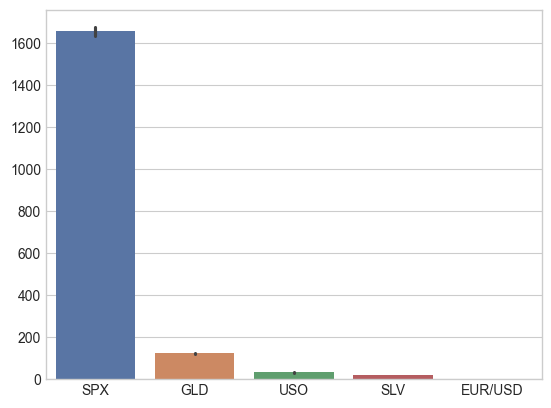

In [14]:
sns.barplot(df)
plt.show()

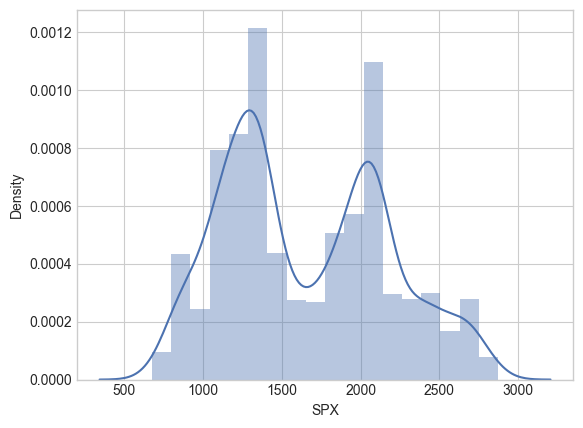

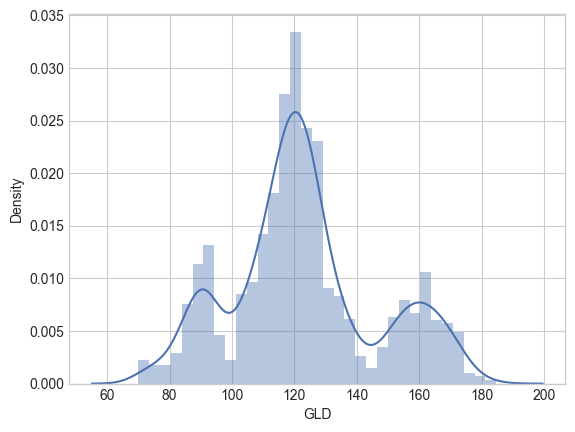

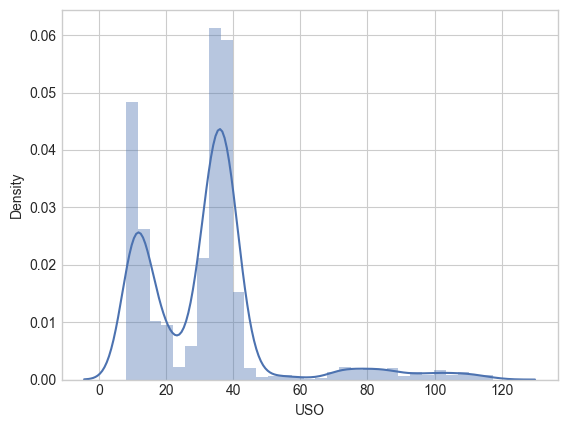

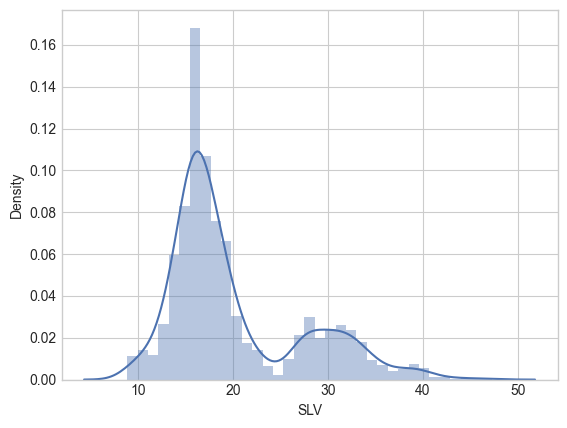

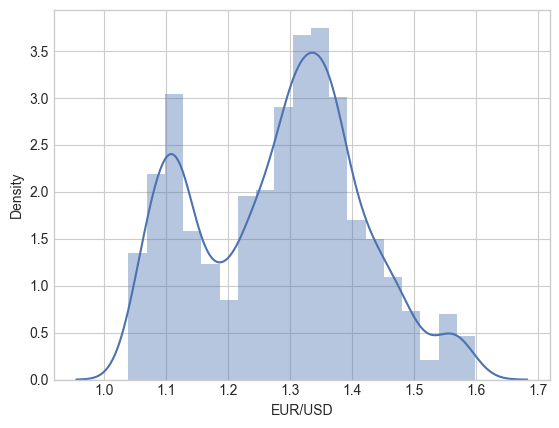

In [16]:
for i in df.columns:
    if i == "Date":
        continue
    else:
        sns.distplot(df[i])
        plt.show()

In [18]:
X = df.drop(columns=["EUR/USD"] , axis=1)
y = df["EUR/USD"]

In [19]:
X_train , X_test ,y_train , y_test = train_test_split(X , y , test_size=0.2 , shuffle=True , random_state=123)


In [20]:
print(f"the shape of X_train is {X_train.shape}")
print(f"the shape of X_test is {X_test.shape}")
print(f"the shape of y_train is {y_train.shape}")
print(f"the shape of y_test is {y_test.shape}")

the shape of X_train is (1832, 5)
the shape of X_test is (458, 5)
the shape of y_train is (1832,)
the shape of y_test is (458,)


In [21]:
col_nums = [col for col in X.columns if df[col].dtype in ["int32" , "int64" , "float32" , "float64"]]
col_catg = [col for col in X.columns if df[col].dtype not in ["int32" , "int64" , "float32" , "float64"]]

if (col_nums) and (col_catg):
    print(f" nums cols is \n {col_nums}")
    print(f" catg cols is \n {col_catg}")

elif col_catg:
        print(f" catg cols is \n {col_catg}")

else:
    print(f" nums cols is \n {col_nums}")

 nums cols is 
 ['SPX', 'GLD', 'USO', 'SLV']
 catg cols is 
 ['Date']


In [22]:
## Assuming "EUR/USD" is a valid column name
pip_num = Pipeline(steps=[("select", DataFrameSelector(col_nums)),
                           ("Simple", SimpleImputer(strategy="median")),
                           ("scaler", StandardScaler())])

# X_train_nums = pip_num.fit_transform(X_train , y_train)

In [23]:
pip_catg = Pipeline(steps=[
                 ("selector", DataFrameSelector(col_catg)),# ==> To select the categorical cols from the Data
                 ("Imputer", SimpleImputer(strategy="constant", fill_value="missing")),
                 ("one_hot", LabelEncoder())
                ])

In [24]:
def Preprocessing(cols_nums, col_catg, X_train, X_test):
    if cols_nums and col_catg:
        # total pipeline to concatenate the num_pipeline and cate_pipeline
        total_pipeline = FeatureUnion(transformer_list=[("num_pipeline", pip_num),
                                                        ("cate_pipeline", pip_catg)])

        # make fitting
        pip_num.fit(X_train)
        X_train_final= pip_num.transform(X_train)
        X_test_final =  pip_num.transform(X_test)

        return X_train_final, X_test_final

    elif col_catg == [] and cols_nums:
        # make fitting
        pip_num.fit(X_train)
        X_train_final= pip_num.transform(X_train)
        X_test_final =  pip_num.transform(X_test)

        return X_train_final, X_test_final

    else:
        # make fitting
        pip_num.fit(X_train)
        X_train_final= pip_num.transform(X_train)
        X_test_final =  pip_num.transform(X_test)

        return X_train_final, X_test_final



X_train_final, X_test_final = Preprocessing(col_nums, col_catg, X_train, X_test)
print(f"X_train_final is = {X_train_final}")
print("*"*50)
print(f"X_test_final is = {X_test_final}")


X_train_final is = [[-0.65187983  1.71509256  0.30710381  1.59075105]
 [-0.85943297  0.56635239  0.26196036  1.12325055]
 [-0.49316616 -1.51026723  3.44508592 -0.46510663]
 ...
 [ 0.63956305 -0.75838782 -1.09686205 -0.94261478]
 [-0.26330572  1.69611276  0.13656147  1.49782285]
 [ 0.33289758  0.13972631  0.19524805 -0.03048871]]
**************************************************
X_test_final is = [[-1.17185189 -0.92834772  0.37532086 -0.58519861]
 [ 1.92741226  0.18847143 -0.92581797 -0.63380721]
 [ 1.5486445  -0.01427309 -1.11642428 -0.5465978 ]
 ...
 [ 1.94580132  0.06035424 -1.0015589  -0.56661297]
 [ 0.94899989  0.21133404 -1.04268973 -0.12341691]
 [ 0.97102066 -0.0901941  -1.01861314 -0.46081778]]


## Using Model 

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
# Define LightGBM regressor
LGBM = LGBMRegressor(random_state=42)

# Define hyperparameter grid for LightGBM
hyper_params = {
    "n_estimators": [100, 200, 300, 400],
    "max_depth": [3, 6, 9, 12],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 0.9, 1.0],
    "colsample_bytree": [0.8, 0.9, 1.0],
    "reg_alpha": [0, 0.1, 0.5], # L1
    "reg_lambda": [0, 0.1, 0.5] # L2
}


# Create GridSearchCV object
lgbm_hyper = GridSearchCV(
    estimator=LGBM,
    param_grid=hyper_params,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit the model
lgbm_model = lgbm_hyper.fit(X_train_final, y_train)


Fitting 5 folds for each of 3888 candidates, totalling 19440 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 1832, number of used features: 4
[LightGBM] [Info] Start training from score 1.284061
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [29]:
# Print best parameters
print(f"Best Parameter is \n {lgbm_model.best_params_}")


Best Parameter is 
 {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 12, 'n_estimators': 400, 'reg_alpha': 0, 'reg_lambda': 0, 'subsample': 0.8}


In [ ]:
# Get the best estimator
LGBM_reg = lgbm_model.best_estimator_
print(LGBM_reg)

# Perform cross-validation and get scores
cross_val = cross_val_score(estimator=LGBM_reg, X=X_train_final, y=y_train,
                          cv=5, scoring="neg_mean_squared_error", n_jobs=-1)

print("Score is ==>>\n ", abs(cross_val))
print("cross val score mean is ==>> ", cross_val.mean() * -1)


LGBMRegressor(colsample_bytree=0.9, learning_rate=0.05, max_depth=12,
              n_estimators=400, random_state=42, reg_alpha=0, reg_lambda=0,
              subsample=0.8)
Score is ==>>
  [0.00030376 0.00040397 0.00032842 0.00051649 0.00041594]
cross val score mean is ==>>  0.0003937153299607051


In [42]:

# Make cross-validation predictions
cross_val_pred = cross_val_predict(estimator=LGBM_reg, X=X_train_final, y=y_train,
                                 cv=5, method="predict", n_jobs=-1)

# Calculate mean squared error
mse = mean_squared_error(y_train, cross_val_pred)

# Print the MSE
print(f"The  mean squared error is {mse:.4f}")


The  mean squared error is 0.0004


In [32]:

# Get feature importances
feat_import_lgbm = {}
for name, score in zip(col_nums, LGBM_reg.feature_importances_[:6]):
    feat_import_lgbm[name] = score

keys_lgbm = feat_import_lgbm.keys()
values_lgbm = feat_import_lgbm.values()

# Create dataframe for visualization
X = pd.DataFrame({"features": keys_lgbm, "Scores": values_lgbm})


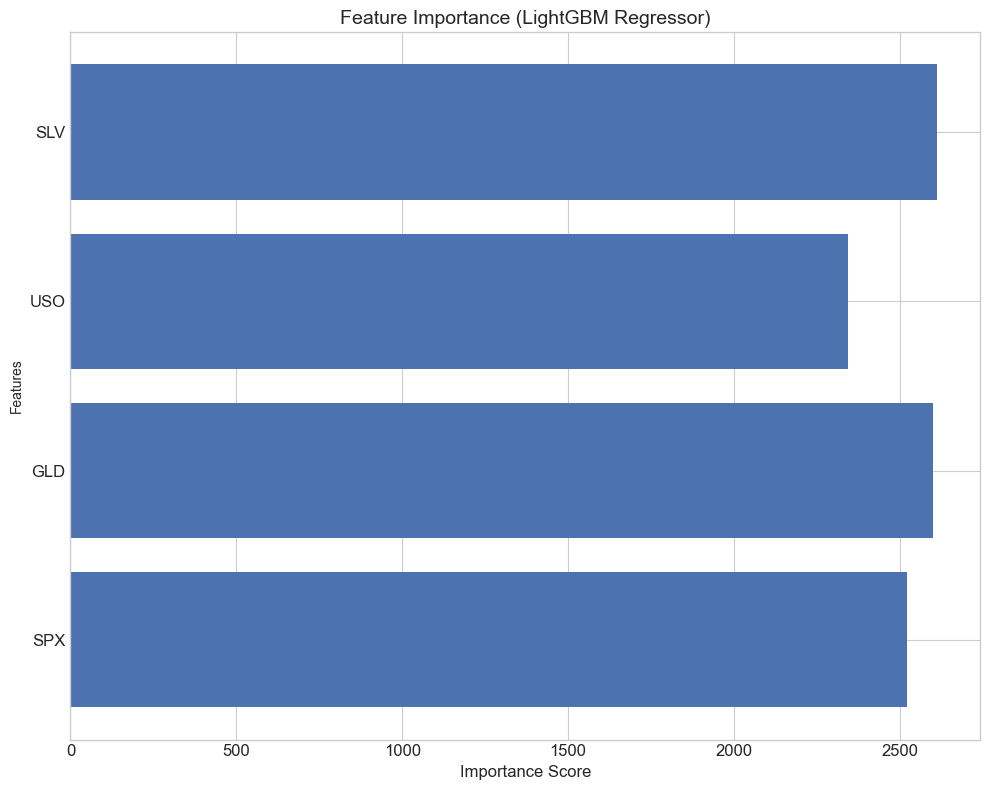

In [33]:

# Visualize feature importances
plt.figure(figsize=(10, 8))
plt.barh(X["features"], X["Scores"])
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features")
plt.title("Feature Importance (LightGBM Regressor)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()



   prediction    actual
0    1.428795  1.471800
1    1.224893  1.232970
2    1.179018  1.177579
3    1.347591  1.362175
4    1.431429  1.409900
5    1.244966  1.237501
6    1.120978  1.112595
7    1.324429  1.362806
8    1.310725  1.300728
9    1.581596  1.570007


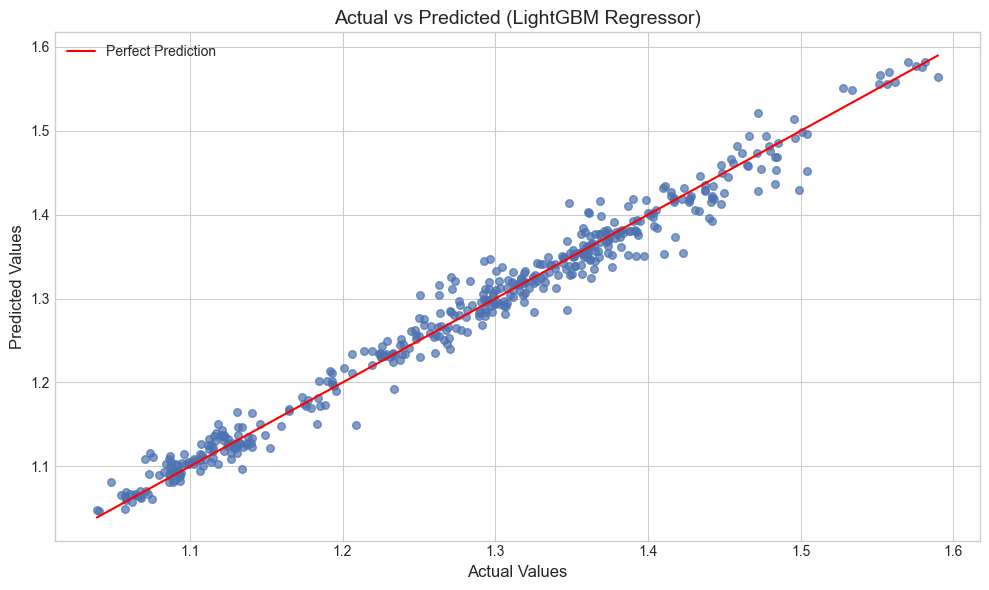

In [34]:
# Make predictions on test data
test_predictions = LGBM_reg.predict(X_test_final)

# Compare predictions with actual values
results_df = pd.DataFrame(np.c_[test_predictions, y_test], columns=["prediction", "actual"])
print(results_df.head(10))

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, s=30, alpha=0.7)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_test, 1))(np.unique(y_test)),
         color='red', label='Perfect Prediction')

plt.legend()
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Actual vs Predicted (LightGBM Regressor)", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()



In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f"Test MSE: {mse:.6f}")
print(f"Test MAE: {mae:.6f}")
print(f"Test R² Score: {r2:.6f}")

Test MSE: 0.000336
Test MAE: 0.013088
Test R² Score: 0.979802


In [36]:
import pickle

# Save the model
model_filename = 'lgbm_regression_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(LGBM_reg, file)
print(f"Model saved to {model_filename}")


Model saved to lgbm_regression_model.pkl
